# Test del efecto hipnótico de la hiosciamina

## Test de Student con dos muestras

The probable error of a mean, Student, Biometrika volumen 6, issue 1, (1908), section IX, pág. 20.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

**Datos**

In [2]:
scyamine_data = pd.read_csv("test_student.csv")
scyamine_data

,Dextro,Levo
0,0.7,1.9
1,-1.6,0.8
2,-0.2,1.1
3,-1.2,0.1
4,-0.1,-0.1
5,3.4,4.4
6,3.7,5.5
7,0.8,1.6
8,0.0,4.6
9,2.0,3.4


$H_0$: Levo es igual de hipnótica que dextro <br>

In [3]:
z = scyamine_data["Levo"]-scyamine_data["Dextro"]
z

0    1.2
1    2.4
2    1.3
3    1.3
4    0.0
5    1.0
6    1.8
7    0.8
8    4.6
9    1.4
dtype: float64

In [4]:
print("Media de los datos: ", z.mean())

Media de los datos:  1.58


In [5]:
print("Desviación estándar de los datos: ", z.std(ddof=1))

Desviación estándar de los datos:  1.2299954832798732


In [6]:
ndata = len(scyamine_data.index)
zmean_sigma = z.std()/ math.sqrt(ndata)
print("Desviación estándar de la media: ", zmean_sigma )

Desviación estándar de la media:  0.3889587238883952


Estadística t de Student

In [7]:
t2 = z.mean() / zmean_sigma
t2

4.062127683382037

In [8]:
ndof = ndata - 1
pvalue = scipy.stats.t.sf(t2, df=ndof)
print(f"Pvalue: {pvalue:.2e}")

Pvalue: 1.42e-03


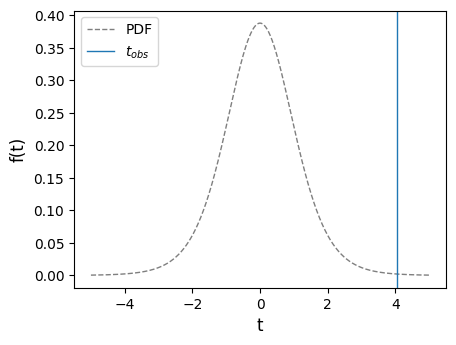

In [9]:
fig2, ax2 = plt.subplots()
ax2.set_xlabel("t")
ax2.set_ylabel("f(t)")
x = np.linspace(-5,5,1000)
ax2.plot(x, scipy.stats.t.pdf(x, ndof), ls='--', color='tab:grey', label="PDF")
ax2.axvline(t2, color='tab:blue', label=r"$t_{obs}$")
ax2.legend()
plt.show()

## Test de Student de dos muestras con scipy

*Nota*: las horas de sueño ganadas dependen de cada paciente. Los pacientes que durmieron más con la hiosciamina levo también durmieron más la dextro. En términos estadísticos significa que las variables $X_1$: {horas ganadas con dextro} y $X_2$: {horas ganadas con levo} están correlacionadas. Por lo tanto, aplico la versión correlacionada del test de Student de dos muestras con la función scipy.stats.ttest_rel. 

In [10]:
t_obs, pvalue = scipy.stats.ttest_rel(scyamine_data["Levo"], scyamine_data["Dextro"], alternative='greater')
print(f"t observado = {t_obs:.2f}")
print(f"pvalue = {pvalue*100:.2f}%")

t observado = 4.06
pvalue = 0.14%


Si las muestras no están correlacionadas corresponde aplicar la versión independiente del test con scipy.stats.ttest_rel.    

## Informe del resultado

In [11]:
alpha = pvalue
print(f"La hiosciamina levo es más hipnótica que la dextro con una signficancia de {100*alpha:.2f}%")

La hiosciamina levo es más hipnótica que la dextro con una signficancia de 0.14%


In [12]:
CL = 1 - alpha
print(f"La hiosciamina levo es más hipnótica que la dextro con un nivel de confianza de {100*CL:.2f}%")

La hiosciamina levo es más hipnótica que la dextro con un nivel de confianza de 99.86%


In [13]:
nsigmas = scipy.stats.norm.ppf(CL)
print(f"La hiosciamina levo es más hipnótica que la dextro con un nivel de confianza de {nsigmas:.1f} sigmas")

La hiosciamina levo es más hipnótica que la dextro con un nivel de confianza de 3.0 sigmas
